# Time Series Forecasting dengan Metode Backpropagation
Pada projek ini akan melakukan _time series forecasting_ dengan metode Backpropagation. Metode Backpropagation yang digunakan ditulis dari algoritma yang ada (_from scratch_) pada file yang berbeda. Selain metode yang ditulis dari dasar, fungsi standarisasi dan pemecahan data juga ditulis dari dasar dengan meninjau kebutuhan-kebutuhan yang diperlukan. Projek ini akan menggunakan beberapa contoh-contoh kasus yang sering terjadi di sekitar kita.

# Import Library

In [1]:
import import_ipynb
from backpropagation import Backpropagation
from prepocessing import MinMaxScaler, train_test_split_data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

importing Jupyter notebook from backpropagation.ipynb


## Contoh 1: Retail Sales Forecasting
Pada contoh ini akan dilakukan _time series forecasting_ dengan beberapa kasus
1. Kasus 1: Perbandingan jumlah neuron untuk _time series forecasting_ <br>
Pada kasus ini akan di analisis bagaimana pengaruh jumlah neuron pada metode Backpropagation untuk _time series forecasting_ dan hasilnya di visualisasikan dengan grafik.
2. Kasus 2: Perbandingan jumlah epoch untuk _time series forecasting_ <br>
Pada kasus ini akan di analisis bagaimana pengaruh jumlah epoch pada metode Backpropagation untuk _time series forecasting_ dan hasilnya di visualisasikan dengan grafik.
3. Kasus 3: _Multivariable time series forecasting_ <br>
Pada kasus ini berbeda dengan kasus-kasus sebelumnya yang meninjau satu macam keluaran, pada kasus ini keluaran yang ditinjau lebih dari satu jenis dengan data latih yang sama.

#### Ambil data

In [2]:
df = pd.read_csv("mock_kaggle.csv",index_col=[0],parse_dates=True)
df.columns=["penjualan","persediaan","harga"]
df.tail()

,penjualan,persediaan,harga
data,,,
2016-07-27,98,3179,2.39
2016-07-28,108,3071,2.39
2016-07-29,128,4095,2.39
2016-07-30,270,3825,2.39
2016-07-31,183,3642,2.39


#### Normalisasi data

In [3]:
scaler_c1 = MinMaxScaler()
data_c1 = scaler_c1.fit_transform(df["penjualan"])

#### Mengambil data latih dan data uji
Tahap ini akan mengubah data series menjadi data fitur dan data uji. Misalnya terdapat data series
$$1,2,3,4,5,6,7,8$$
dan akan meninjau setiap 5 step data akan digunakan sebagai data untuk memprediksi hasil berikutnya, maka akan terbentuk data seperti berikut 

|x1|x2|x3|x4|x5|target|
|-|-|-|-|-|-|
|1|2|3|4|5|6|
|2|3|4|5|6|7|
|3|4|5|6|7|8|

In [4]:
x_train_c1, x_test_c1, y_train_c1, y_test_c1 = train_test_split_data(data_c1, 2016, 30)

### Kasus 1: Perbandingan jumlah neuron untuk time series forecasting
Data yang digunakan adalah data penjualan

##### Melatih model dan memprediksi data

In [5]:
neurons = [10,20]
pred_neurons = []
for n in neurons:
    model = Backpropagation(neuron=n, max_epoch=900)
    model.fit(x_train_c1, y_train_c1)
    pred_neurons.append(model.predict(x_test_c1))

Max Epoch: 900 	 Max RMSE: 0.11546236375180766
Max Epoch: 791 	 Max RMSE: 0.09991348695791973


##### Ploting keseluruhan data

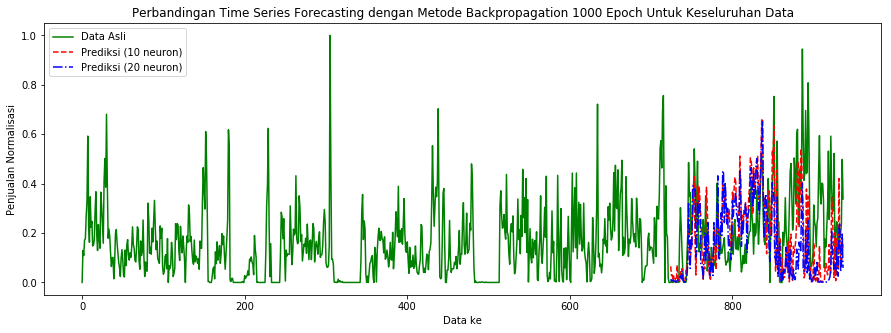

In [6]:
plt.figure(figsize=(15,5))
plt.plot(range(len(data_c1)),data_c1,"g-", label="Data Asli")

plt.plot(range(len(data_c1)-len(y_test_c1),len(data_c1)),
         pred_neurons[0],"r--", label="Prediksi ("+str(neurons[0])+" neuron)")

plt.plot(range(len(data_c1)-len(y_test_c1),len(data_c1)),
         pred_neurons[1],"b-.", label="Prediksi ("+str(neurons[1])+" neuron)")
         
plt.title("Perbandingan Time Series Forecasting dengan Metode Backpropagation 1000 Epoch Untuk Keseluruhan Data")
plt.xlabel("Data ke")
plt.ylabel("Penjualan Normalisasi")
plt.legend()
plt.show()

##### Ploting data uji

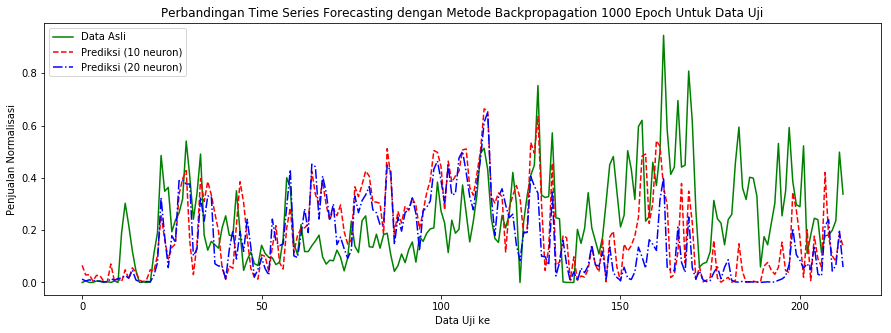

In [7]:
plt.figure(figsize=(15,5))
plt.plot(range(len(y_test_c1)),y_test_c1,"g-", label="Data Asli")
plt.plot(range(len(y_test_c1)),pred_neurons[0],
         "r--", label="Prediksi ("+str(neurons[0])+" neuron)")

plt.plot(range(len(y_test_c1)),pred_neurons[1],
         "b-.", label="Prediksi ("+str(neurons[1])+" neuron)")

plt.title("Perbandingan Time Series Forecasting dengan Metode Backpropagation 1000 Epoch Untuk Data Uji")
plt.xlabel("Data Uji ke")
plt.ylabel("Penjualan Normalisasi")
plt.legend(loc="upper left")
plt.show()

**Hasil: Banyak neuron dengan selisih yang tidak terlalu besar menghasilkan hasil tidak jauh berbeda**

### Kasus 2: Perbandingan jumlah epoch untuk time series forecasting
Data yang digunakan adalah data penjualan

##### Melatih model dan memprediksi data

In [8]:
epochs = [200, 500, 800]
pred_epochs = []
for e in epochs:
    model = Backpropagation(neuron=3, max_epoch=e)
    model.fit(x_train_c1, y_train_c1)
    pred_epochs.append(model.predict(x_test_c1))

Max Epoch: 200 	 Max RMSE: 0.1129071855754211
Max Epoch: 500 	 Max RMSE: 0.10372391549868504
Max Epoch: 650 	 Max RMSE: 0.09999505535245386


##### Ploting keseluruhan data

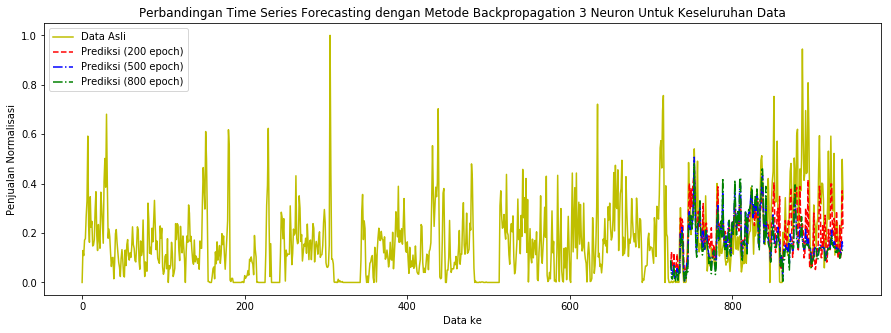

In [9]:
plt.figure(figsize=(15,5))
plt.plot(range(len(data_c1)),data_c1,"y-", label="Data Asli")

plt.plot(range(len(data_c1)-len(y_test_c1),len(data_c1)),
         pred_epochs[0],"r--", label="Prediksi ("+str(epochs[0])+" epoch)")

plt.plot(range(len(data_c1)-len(y_test_c1),len(data_c1)),
         pred_epochs[1],"b-.", label="Prediksi ("+str(epochs[1])+" epoch)")

plt.plot(range(len(data_c1)-len(y_test_c1),len(data_c1)),
         pred_epochs[2],"g-.", label="Prediksi ("+str(epochs[2])+" epoch)")

plt.title("Perbandingan Time Series Forecasting dengan Metode Backpropagation 3 Neuron Untuk Keseluruhan Data")
plt.xlabel("Data ke")
plt.ylabel("Penjualan Normalisasi")
plt.legend()
plt.show()

##### Ploting data uji

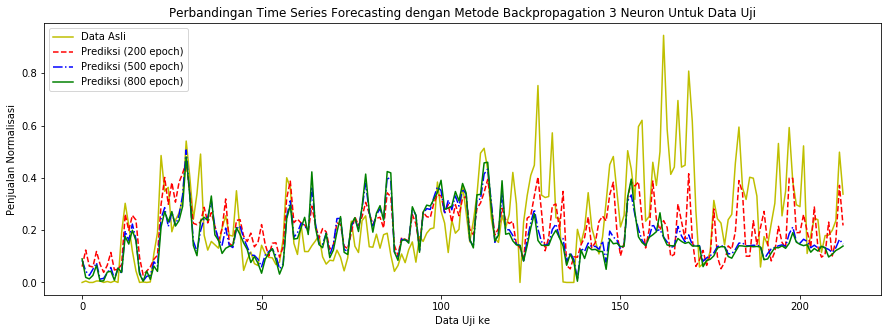

In [10]:
plt.figure(figsize=(15,5))
plt.plot(range(len(y_test_c1)),y_test_c1,"y-", label="Data Asli")

plt.plot(range(len(y_test_c1)),pred_epochs[0],
         "r--", label="Prediksi ("+str(epochs[0])+" epoch)")

plt.plot(range(len(y_test_c1)),pred_epochs[1],
         "b-.", label="Prediksi ("+str(epochs[1])+" epoch)")

plt.plot(range(len(y_test_c1)),pred_epochs[2],
         "g-", label="Prediksi ("+str(epochs[2])+" epoch)")

plt.title("Perbandingan Time Series Forecasting dengan Metode Backpropagation 3 Neuron Untuk Data Uji")
plt.xlabel("Data Uji ke")
plt.ylabel("Penjualan Normalisasi")
plt.legend(loc="upper left")
plt.show()

**Hasil: Banyak epoch tidak terlalu mempengaruhi hasil, yang lebih berpegaruh adalah error yang dihasilkan dari setiap epoch**

### Kasus 3: Multivariable time series forecasting
Data yang digunakan adalah data penjualan, persediaan, dan harga. Pada kasus ini data fitur akan ditinjau dari data penjualan, sedangkan targetnya adalah data penjualan, persediaan, dan harga

#### Normalisasi data

In [11]:
scaler_c1k3 = MinMaxScaler()
data1_c1k3 = scaler_c1k3.fit_transform(df["penjualan"])
data2_c1k3 = scaler_c1k3.fit_transform(df["persediaan"])
data3_c1k3 = scaler_c1k3.fit_transform(df["harga"])

#### Mengambil data latih dan data uji

In [12]:
x1_train_c1k3, x1_test_c1k3, y1_train_c1k3, y1_test_c1k3 = train_test_split_data(data1_c1k3,2016,step=30)
x2_train_c1k3, x2_test_c1k3, y2_train_c1k3, y2_test_c1k3 = train_test_split_data(data2_c1k3,2016,step=30)
x3_train_c1k3, x3_test_c1k3, y3_train_c1k3, y3_test_c1k3 = train_test_split_data(data3_c1k3,2016,step=30)

In [13]:
x_train_c1k3 = x1_train_c1k3
x_test_c1k3 = x1_test_c1k3

y_train_c1k3 = np.hstack((y1_train_c1k3.reshape(-1,1),
                          y2_train_c1k3.reshape(-1,1),
                          y3_train_c1k3.reshape(-1,1)))

tytest_c1k3 = np.hstack((y1_test_c1k3.reshape(-1,1),
                         y2_test_c1k3.reshape(-1,1),
                         y3_test_c1k3.reshape(-1,1)))

##### Melatih model

In [14]:
model_c1k3 = Backpropagation(7,max_epoch=1000)
model_c1k3.fit(x_train_c1k3, y_train_c1k3)

Max Epoch: 1000 	 Max RMSE: 0.20311169767732234


##### Memprediksi data

In [15]:
pred_c1k3 = model_c1k3.predict(x_test_c1k3)

##### Ploting data uji pada masing-masing prediksi

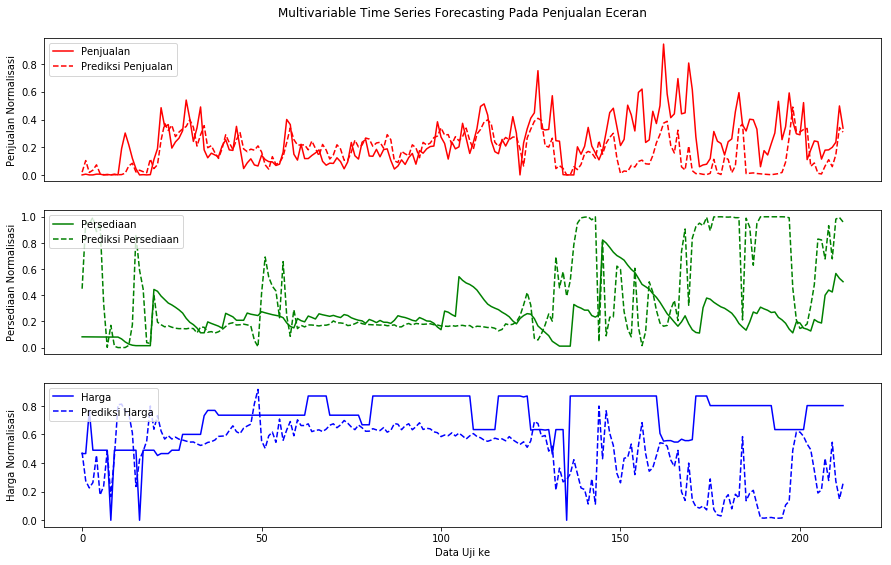

In [16]:
plt.figure(figsize=(15,9))

plt.subplot(3,1,1)
plt.plot(range(len(y1_test_c1k3)),y1_test_c1k3,"r-", label="Penjualan")
plt.plot(range(len(y1_test_c1k3)),pred_c1k3[:,0],"r--", label="Prediksi Penjualan")
plt.title("Multivariable Time Series Forecasting Pada Penjualan Eceran\n")
plt.ylabel("Penjualan Normalisasi")
plt.xticks([])
plt.legend(loc="upper left")

plt.subplot(3,1,2)
plt.plot(range(len(y2_test_c1k3)),y2_test_c1k3,"g-", label="Persediaan")
plt.plot(range(len(y2_test_c1k3)),pred_c1k3[:,1],"g--", label="Prediksi Persediaan")
plt.ylabel("Persediaan Normalisasi")
plt.xticks([])
plt.legend(loc="upper left")

plt.subplot(3,1,3)
plt.plot(range(len(y3_test_c1k3)),y3_test_c1k3,"b-", label="Harga")
plt.plot(range(len(y3_test_c1k3)),pred_c1k3[:,2],"b--", label="Prediksi Harga")
plt.xlabel("Data Uji ke")
plt.ylabel("Harga Normalisasi")
plt.legend(loc="upper left")

plt.show()

**Hasil: Prediksi cenderung bagus untuk data penjualan, hal ini dikarenakan data fitur yang digunakan adalah data penjualan**

## Contoh 2: Google Stock Price
Pada contoh ini akan dilakukan _time series forecasting_ dengan beberapa kasus
1. Kasus 1: Prediksi harga saham dengan _time series forecasting_ <br>
Pada kasus ini akan dilakukan prediksi harga saham dengan satu jenis data dan satu jenis prediksi.
2. Kasus 2: Prediksi harga saham pada _multivariable time series forecasting_ <br>
Pada kasus ini berbeda dengan kasus 3 pada contoh pertama yang mana menggunakan satu jenis data yang sama sebagai data fitur dan menghasilkan 3 jenis prediksi, pada kasus ini data fitur yang digunakan adalah 3 jenis data dan akan menghasilkan 3 jenis prediksi.
3. Kasus 3: Prediksi harga saham beberapa waktu kedepan dengan _time series forecasting_ <br>
Pada kasus ini berbeda dengan kasus-kasus sebelumnya yang menggunakan data uji aslinya sebagai target prediksi juga, pada kasus ini data yang telah diprediksi akan digunakan sebagai data prediksi untuk prediksi-prediksi setelahnnya. Misalkan data yang diprediksi $x_1,x_2,x_3$ dan menghasilkan prediksi $x_4$, maka untuk memprediksi $x_5$ akan menggunakan data $x_2,x_3,x_4$ (hasil prediksi digunakan sebagai data uji setelahnya)

#### Ambil data

In [17]:
df2 = pd.read_csv("Google_Stock_Price.csv", sep="/", index_col=[0], parse_dates=True)
df2.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-25,829.62,835.77,825.06,835.67,"1,494,500"
2017-01-26,837.81,838.00,827.01,832.15,"2,973,900"
2017-01-27,834.71,841.95,820.44,823.31,"2,965,800"
2017-01-30,814.66,815.84,799.80,802.32,"3,246,600"
2017-01-31,796.86,801.25,790.52,796.79,"2,160,600"


### Kasus 1: Prediksi harga saham dengan time series forecasting
Data yang digunakan adalah data open

#### Normalisasi data

In [18]:
scaler_c2k1 = MinMaxScaler()
data_c2k1 = scaler_c2k1.fit_transform(df2["Open"])

#### Mengambil data latih dan data uji

In [19]:
x_train_c2k1, x_test_c2k1, y_train_c2k1, y_test_c2k1 = train_test_split_data(data_c2k1, 2017, 60)

##### Melatih model

In [20]:
model_c2k1 = Backpropagation(7, max_epoch=1000)
model_c2k1.fit(x_train_c2k1, y_train_c2k1)

Max Epoch: 31 	 Max RMSE: 0.0965762472126146


##### Memprediksi data

In [21]:
pred_c2k1 = model_c2k1.predict(x_test_c2k1)

##### Ploting data

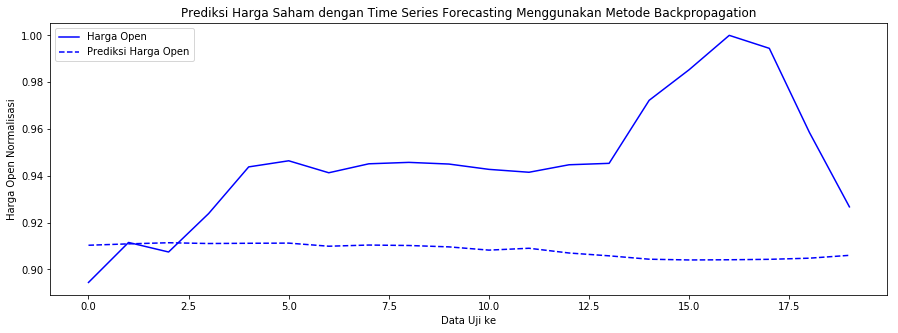

In [22]:
plt.figure(figsize=(15,5))
plt.plot(range(len(y_test_c2k1)),
         y_test_c2k1,"b-", label="Harga Open")

plt.plot(range(len(y_test_c2k1)),
         pred_c2k1,"b--", label="Prediksi Harga Open")
plt.title("Prediksi Harga Saham dengan Time Series Forecasting Menggunakan Metode Backpropagation")

plt.xlabel("Data Uji ke")
plt.ylabel("Harga Open Normalisasi")
plt.legend(loc="upper left")
plt.show()

**Hasil: Prediksi tidak terlalu bagus karena masih underfitting**

### Kasus 2: Prediksi harga saham pada multivariable time series forecasting
Data yang digunakan adalah data open, high, dan low. Pada kasus ini data fitur akan ditinjau dari semua data dan targetnya adalah harga open, high, dan low

#### Normalisasi data

In [23]:
scaler_c2k2 = MinMaxScaler()
data1_c2k2 = scaler_c2k2.fit_transform(df2["Open"])
data2_c2k2 = scaler_c2k2.fit_transform(df2["High"])
data3_c2k2 = scaler_c2k2.fit_transform(df2["Low"])

#### Mengambil data latih dan data uji

In [24]:
x1_train_c2k2, x1_test_c2k2, y1_train_c2k2, y1_test_c2k2 = train_test_split_data(data1_c2k2, 2017, 7)
x2_train_c2k2, x2_test_c2k2, y2_train_c2k2, y2_test_c2k2 = train_test_split_data(data2_c2k2, 2017, 7)
x3_train_c2k2, x3_test_c2k2, y3_train_c2k2, y3_test_c2k2 = train_test_split_data(data3_c2k2, 2017, 7)

In [25]:
x_train_c2k2 = np.hstack((x1_train_c2k2,x2_train_c2k2,x3_train_c2k2))

x_test_c2k2 = np.hstack((x1_test_c2k2,x2_test_c2k2,x3_test_c2k2))

y_train_c2k2 = np.hstack((y1_train_c2k2.reshape(-1,1),
                          y2_train_c2k2.reshape(-1,1),
                          y3_train_c2k2.reshape(-1,1)))

y_test_c2k2 = np.hstack((y1_test_c2k2.reshape(-1,1),
                         y2_test_c2k2.reshape(-1,1),
                         y3_test_c2k2.reshape(-1,1)))

##### Melatih model

In [26]:
model_c2k2 = Backpropagation(7,max_epoch=1000)
model_c2k2.fit(x_train_c2k2, y_train_c2k2)

Max Epoch: 1000 	 Max RMSE: 0.10102420352871978


##### Memprediksi data

In [27]:
pred_c2k2 = model_c2k2.predict(x_test_c2k2)

##### Ploting data

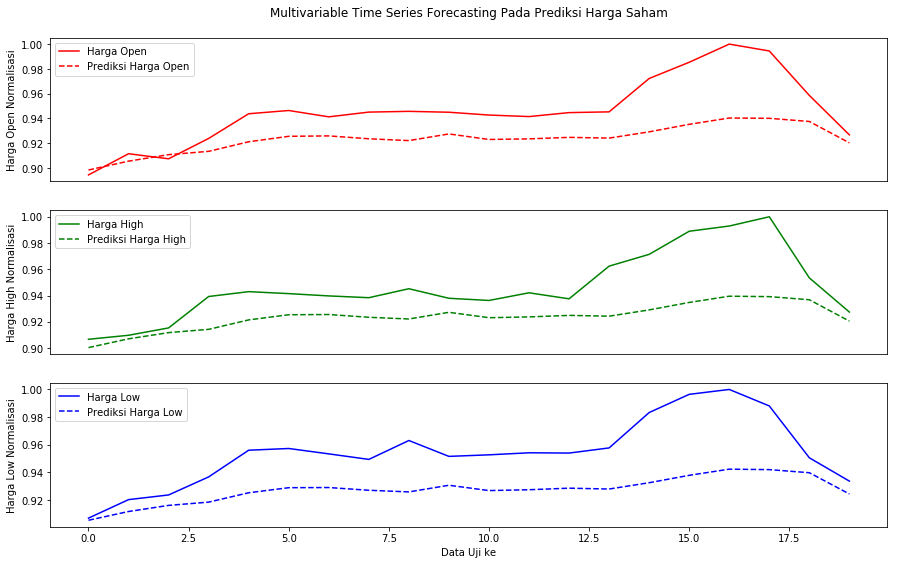

In [28]:
plt.figure(figsize=(15,9))

plt.subplot(3,1,1)
plt.plot(range(len(y1_test_c2k2)),y1_test_c2k2,"r-", label="Harga Open")
plt.plot(range(len(y1_test_c2k2)),pred_c2k2[:,0],"r--", label="Prediksi Harga Open")
plt.title("Multivariable Time Series Forecasting Pada Prediksi Harga Saham\n")
plt.ylabel("Harga Open Normalisasi")
plt.xticks([])
plt.legend(loc="upper left")

plt.subplot(3,1,2)
plt.plot(range(len(y2_test_c2k2)),y2_test_c2k2,"g-", label="Harga High")
plt.plot(range(len(y2_test_c2k2)),pred_c2k2[:,1],"g--", label="Prediksi Harga High")
plt.ylabel("Harga High Normalisasi")
plt.xticks([])
plt.legend(loc="upper left")

plt.subplot(3,1,3)
plt.plot(range(len(y3_test_c2k2)),y3_test_c2k2,"b-", label="Harga Low")
plt.plot(range(len(y3_test_c2k2)),pred_c2k2[:,2],"b--", label="Prediksi Harga Low")
plt.xlabel("Data Uji ke")
plt.ylabel("Harga Low Normalisasi")
plt.legend(loc="upper left")

plt.show()

**Hasil: Prediksi sudah berbeda setiap jenis, akan tetapi hasilnya masih underfitting**

### Kasus 3: Prediksi harga saham beberapa waktu kedepan dengan _time series forecasting_
Data yang digunakan adalah data open

#### Normalisasi data

In [29]:
scaler_c2k3 = MinMaxScaler()
data_c2k3 = scaler_c2k3.fit_transform(df2["Open"])

#### Menggambil data latih dan data uji sementara

In [30]:
step=60
x_train_c2k3, x_test_c2k3, y_train_c2k3, y_test_c2k3 = train_test_split_data(data_c2k3, 2017, step)

##### Melatih model

In [31]:
model_c2k3 = Backpropagation(7, max_epoch=1000)
model_c2k3.fit(x_train_c2k3, y_train_c2k3)

Max Epoch: 35 	 Max RMSE: 0.09773924743919736


##### Memprediksi harga menggunakan data prediksi sebelumnya

In [32]:
def LongPredict(model,x_train, y_test, step):
    n = len(y_test)
    test_data = x_train[-step:,:]
    pred_result = []
    for i in range(n):
        pred = model.predict(test_data[-1,:])
        pred_result.append(pred)
        temp_data = np.append(test_data[-1,1:],pred)
        test_data = np.vstack((test_data,temp_data))
    return pred_result

In [33]:
pred_c2k3 = LongPredict(model_c2k3, x_train_c2k3, y_test_c2k2, step)

##### Ploting data

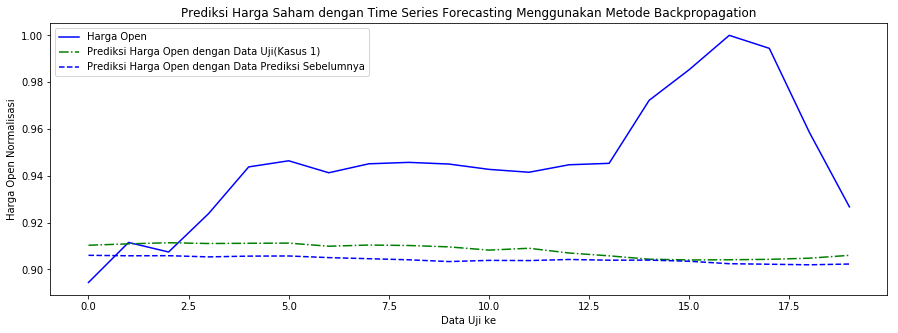

In [36]:
plt.figure(figsize=(15,5))
plt.plot(range(len(y_test_c2k3)),
         y_test_c2k3,"b-", label="Harga Open")

plt.plot(range(len(y_test_c2k1)),
         pred_c2k1,"g-.", label="Prediksi Harga Open dengan Data Uji(Kasus 1)")

plt.plot(range(len(y_test_c2k3)),
         pred_c2k3,"b--", label="Prediksi Harga Open dengan Data Prediksi Sebelumnya")

plt.title("Prediksi Harga Saham dengan Time Series Forecasting Menggunakan Metode Backpropagation")

plt.xlabel("Data Uji ke")
plt.ylabel("Harga Open Normalisasi")
plt.legend(loc="upper left")
plt.show()

**Hasil: Hasil prediksi menggunakan data prediksi sebelumnya hampir sama dengan hasil prediksi dengan data uji, akan tetapi masih tidak terlalu bagus**

## Kesimpulan
1. Time Series Forecasting menggunakan metode Backpropagation tidak selalu bisa bagus
2. Hasil prediksi dipengaruhi dengan jumlah neuron dan epoch sehingga hasilnya bisa berbeda-beda
3. Proses pelatihan model yang lama, hal ini disebabkan karena data yang terlalu besar dan model dibuat dari dasar (_from scracth_)
4. Metode Backpropagation memiliki keunggulan dapat memprediksi data lebih dari satu sekaligus (_Multivariable Time Series Forecasting_)
5. Metode ini masih dapat dioptimasi dengan merubah-rubah jumlah neuron, epoch, _learning rate_, nilai error, dsb. Tentu saja hal ini juga dipengaruhi oleh spesifikasi perangkat yang digunakan
6. Cara lain untuk mendapatkan hasil yang lebih baik adalah menggunakan Backpropagation yang lebih bagus (_lebih dari 1 layer_). Karena pada projek ini metode yang digunakan adalah Backpropagation standart.